<font size=5> 1-Dimesional cellular Automata </font>

Name: PARTH VAYA

In this project, the idea is to calculate a new state value in the next generation by looking at all neighbours states in the previous generation

a) Write a code to solve the iteration of a one-dimensional Boolean cellular automata. The code should work for N sites and one should be able to select between finite grids or periodic boundary conditions.

- here to begin with, the idea is to define the rules for updating the state of each cell based on its neighbours and then iterating this process over time.
- firstly, an initial array with randomized 0s and 1s is generated. Next, the possible neighbour combinations are determined and a specific rule assigns a 0 or a 1 to each combination of neighbours.
- considering boundary conditions, the finite grid method will assumes an extra 0 at each end of the array to determine the neighbours while the periodic boundary condition assumes that the left neighbour of the first element is the last element of the array and that the right neighbour of the last element is the first element of the array
- because this is 1 dimensional, each element has only 2 neighbours 
- finally each element of the original array is asigned a new value depending on the neigbours it had and a new array is generated with these new values. 

In this code I gave the user inputs so they can choose the number of Sites, the condition which is either Finite boundary condition or Periodic boundary condition, which satisfies part a)

Generated array with finite bound: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


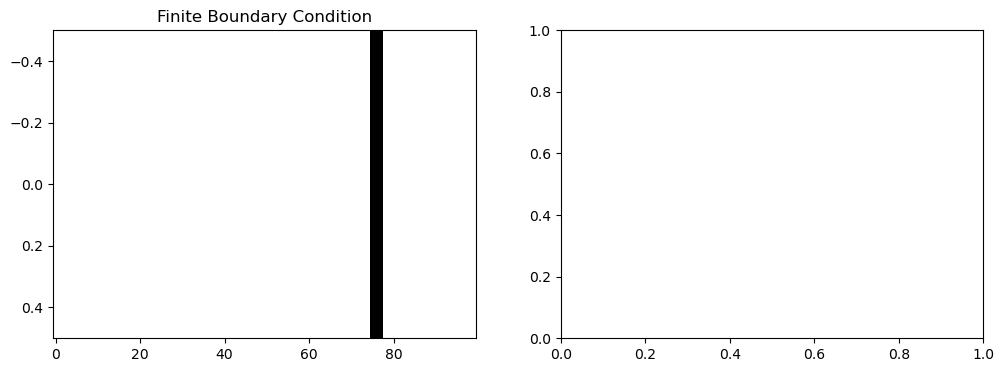

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0

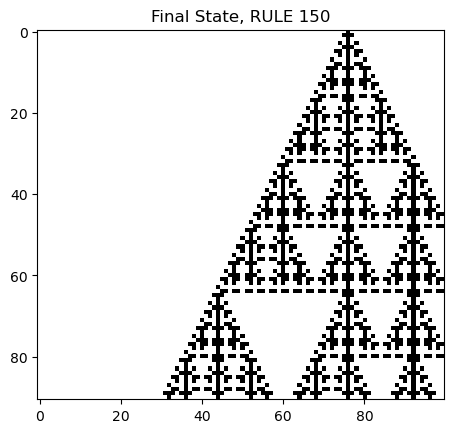

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def apply_rule_finite_grid(current_state, rule_bin):
    # Applies the provided rule to the current state of 3 cells for finite grid condition 
    # and returns the new state. Handles edge cells by assuming out-of-bound cells are 0.
    state_int = int(''.join(map(str, current_state)), 2)
    return rule_bin[7 - state_int]

def apply_rule_periodic(current_state, rule_bin):
    # Applies the provided rule to the current state of 3 cells with periodic boundary conditions
    # and returns the new state.
    index = 7 - int(''.join(map(str, current_state)), 2)
    return rule_bin[index]

def visualize_ca(ca_data, title):
    ca_array = np.array(ca_data)
    plt.imshow(ca_array, cmap='binary', interpolation='nearest')
    plt.title(title)
    plt.show()

def generate_initial_state(N):
    # Generate an array with a single seed site
    data = [0] * N
    rand_pos = np.random.randint(0, N - 1)
    data[rand_pos] = 1
    return data

def generate_random_initial_state(N):
    # Generate a random array for the specific number of sites with values 0 and 1 only
    return np.random.randint(2, size=N)

def run_ca(N, condition, cycles, rule_number):
    # New arrays to store output
    a = np.empty(N, dtype=int)
    b = np.empty(N, dtype=int)
    rule_number = 150
    rule_string = np.binary_repr(rule_number, 8)
    rule = np.array([int(bit) for bit in rule_string])

    # Visualization setup
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    initial_state = generate_initial_state(N) if condition == "F" else generate_random_initial_state(N)
    ca_data = [initial_state.copy()]

    cycles = int(cycles)

    if condition == "F":
        print("Generated array with finite bound: ")
        while cycles > 0:
            for i in range(N):
                left = 0 if i == 0 else initial_state[i - 1]
                center = initial_state[i]
                right = 0 if i == N - 1 else initial_state[i + 1]
                a[i] = apply_rule_finite_grid([left, center, right], rule)

            print(a)
            ca_data.append(a.copy())
            
            # For finite boundary condition, also append the initial state
            ca_data.append(initial_state.copy())
            
            # Update and show the plot for finite condition
            ax1.imshow([a], cmap='binary', aspect='auto')
            ax1.set_title('Finite Boundary Condition')
            plt.pause(0.1)

            initial_state = a.copy()
            cycles -= 1

    elif condition == "P":
        data2 = np.empty(N + 2, dtype=int)
        print("Generated array with periodic bound")

        for i in range(N + 2):
            if i == 0:
                data2[i] = initial_state[N - 1]
            elif i == N + 1:
                data2[i] = initial_state[0]
            else:
                data2[i] = initial_state[i - 1]

        while cycles > 0:
            for i in range(1, N + 1):
                left = data2[i - 1]
                center = data2[i]
                right = data2[i + 1]
                b[i - 1] = apply_rule_periodic([left, center, right], rule)

            print(b)
            #ca_data.append(b.copy())
            ca_data.append(data2[:N].copy())
            
            # Update and show the plot for periodic condition
            ax2.imshow([b], cmap='binary', aspect='auto')
            ax2.set_title('Periodic Boundary Condition')
            plt.pause(0.1)

            data2[:N] = b.copy()
            cycles -= 1

    visualize_ca(ca_data, "Final State, RULE 150")

# User inputs
N = input("Enter the number of Sites: ")
condition = input("Finite Grid(F) or Periodic Boundary Conditions(P)? Enter P or F: ") 
cycles = input("Enter number of cycles: ")

# Rule number
rule_number = 150

# Run the cellular automaton
run_ca(int(N), condition, cycles, rule_number)


Now doing for rule 90

Generated array with finite bound: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


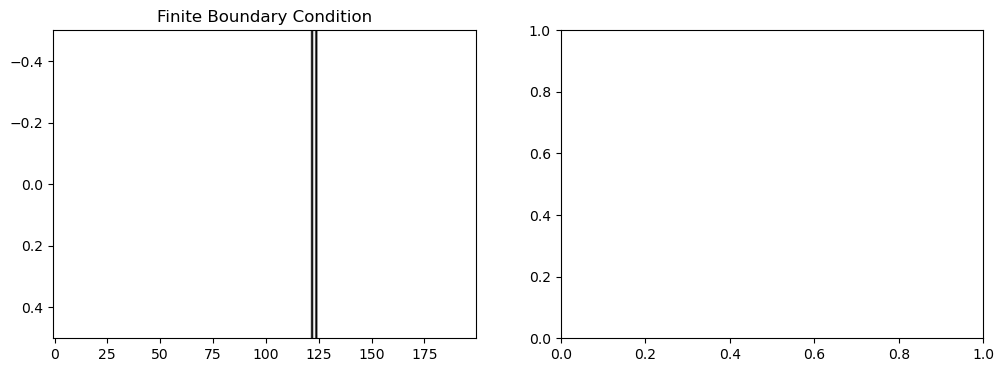

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

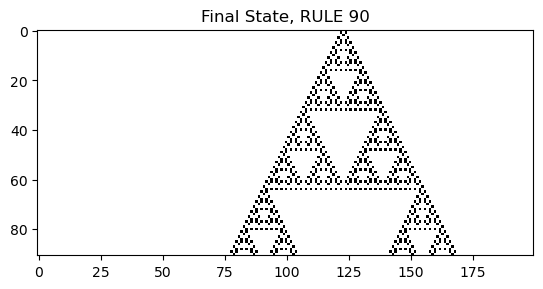

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def apply_rule_finite_grid(current_state, rule_bin):
    # Applies the provided rule to the current state of 3 cells for finite grid condition 
    # and returns the new state. Handles edge cells by assuming out-of-bound cells are 0.
    state_int = int(''.join(map(str, current_state)), 2)
    return rule_bin[7 - state_int]

def apply_rule_periodic(current_state, rule_bin):
    # Applies the provided rule to the current state of 3 cells with periodic boundary conditions
    # and returns the new state.
    index = 7 - int(''.join(map(str, current_state)), 2)
    return rule_bin[index]

def visualize_ca(ca_data, title):
    ca_array = np.array(ca_data)
    plt.imshow(ca_array, cmap='binary', interpolation='nearest')
    plt.title(title)
    plt.show()

def generate_initial_state(N):
    # Generate an array with a single seed site
    data = [0] * N
    rand_pos = np.random.randint(0, N - 1)
    data[rand_pos] = 1
    return data

def generate_random_initial_state(N):
    # Generate a random array for the specific number of sites with values 0 and 1 only
    return np.random.randint(2, size=N)

def run_ca(N, condition, cycles, rule_number):
    # New arrays to store output
    a = np.empty(N, dtype=int)
    b = np.empty(N, dtype=int)
    rule_number = 90
    rule_string = np.binary_repr(rule_number, 8)
    rule = np.array([int(bit) for bit in rule_string])

    # Visualization setup
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    initial_state = generate_initial_state(N) if condition == "F" else generate_random_initial_state(N)
    ca_data = [initial_state.copy()]

    cycles = int(cycles)

    if condition == "F":
        print("Generated array with finite bound: ")
        while cycles > 0:
            for i in range(N):
                left = 0 if i == 0 else initial_state[i - 1]
                center = initial_state[i]
                right = 0 if i == N - 1 else initial_state[i + 1]
                a[i] = apply_rule_finite_grid([left, center, right], rule)

            print(a)
            ca_data.append(a.copy())
            
            # For finite boundary condition, also append the initial state
            ca_data.append(initial_state.copy())
            
            # Update and show the plot for finite condition
            ax1.imshow([a], cmap='binary', aspect='auto')
            ax1.set_title('Finite Boundary Condition')
            plt.pause(0.1)

            initial_state = a.copy()
            cycles -= 1

    elif condition == "P":
        data2 = np.empty(N + 2, dtype=int)
        print("Generated array with periodic bound")

        for i in range(N + 2):
            if i == 0:
                data2[i] = initial_state[N - 1]
            elif i == N + 1:
                data2[i] = initial_state[0]
            else:
                data2[i] = initial_state[i - 1]

        while cycles > 0:
            for i in range(1, N + 1):
                left = data2[i - 1]
                center = data2[i]
                right = data2[i + 1]
                b[i - 1] = apply_rule_periodic([left, center, right], rule)

            print(b)
            #ca_data.append(b.copy())
            ca_data.append(data2[:N].copy())
            
            # Update and show the plot for periodic condition
            ax2.imshow([b], cmap='binary', aspect='auto')
            ax2.set_title('Periodic Boundary Condition')
            plt.pause(0.1)

            data2[:N] = b.copy()
            cycles -= 1

    visualize_ca(ca_data, "Final State, RULE 90")

# User inputs
N = input("Enter the number of Sites: ")
condition = input("Finite Grid(F) or Periodic Boundary Conditions(P)? Enter P or F: ") 
cycles = input("Enter number of cycles: ")

# Rule number
rule_number = 90

# Run the cellular automaton
run_ca(int(N), condition, cycles, rule_number)

Now for rule 18

Generated array with finite bound: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


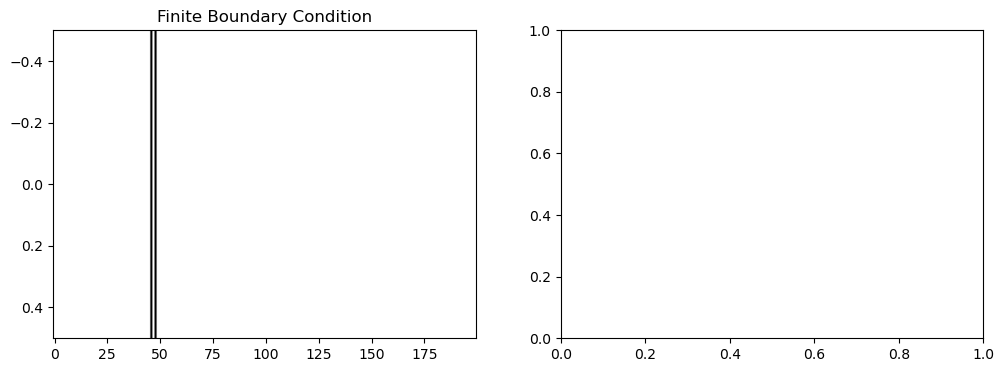

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

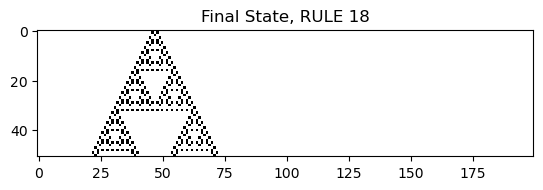

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def apply_rule_finite_grid(current_state, rule_bin):
    # Applies the provided rule to the current state of 3 cells for finite grid condition 
    # and returns the new state. Handles edge cells by assuming out-of-bound cells are 0.
    state_int = int(''.join(map(str, current_state)), 2)
    return rule_bin[7 - state_int]

def apply_rule_periodic(current_state, rule_bin):
    # Applies the provided rule to the current state of 3 cells with periodic boundary conditions
    # and returns the new state.
    index = 7 - int(''.join(map(str, current_state)), 2)
    return rule_bin[index]

def visualize_ca(ca_data, title):
    ca_array = np.array(ca_data)
    plt.imshow(ca_array, cmap='binary', interpolation='nearest')
    plt.title(title)
    plt.show()

def generate_initial_state(N):
    # Generate an array with a single seed site
    data = [0] * N
    rand_pos = np.random.randint(0, N - 1)
    data[rand_pos] = 1
    return data

def generate_random_initial_state(N):
    # Generate a random array for the specific number of sites with values 0 and 1 only
    return np.random.randint(2, size=N)

def run_ca(N, condition, cycles, rule_number):
    # New arrays to store output
    a = np.empty(N, dtype=int)
    b = np.empty(N, dtype=int)
    rule_number = 18
    rule_string = np.binary_repr(rule_number, 8)
    rule = np.array([int(bit) for bit in rule_string])

    # Visualization setup
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    initial_state = generate_initial_state(N) if condition == "F" else generate_random_initial_state(N)
    ca_data = [initial_state.copy()]

    cycles = int(cycles)

    if condition == "F":
        print("Generated array with finite bound: ")
        while cycles > 0:
            for i in range(N):
                left = 0 if i == 0 else initial_state[i - 1]
                center = initial_state[i]
                right = 0 if i == N - 1 else initial_state[i + 1]
                a[i] = apply_rule_finite_grid([left, center, right], rule)

            print(a)
            ca_data.append(a.copy())
            
            # For finite boundary condition, also append the initial state
            ca_data.append(initial_state.copy())
            
            # Update and show the plot for finite condition
            ax1.imshow([a], cmap='binary', aspect='auto')
            ax1.set_title('Finite Boundary Condition')
            plt.pause(0.1)

            initial_state = a.copy()
            cycles -= 1

    elif condition == "P":
        data2 = np.empty(N + 2, dtype=int)
        print("Generated array with periodic bound")

        for i in range(N + 2):
            if i == 0:
                data2[i] = initial_state[N - 1]
            elif i == N + 1:
                data2[i] = initial_state[0]
            else:
                data2[i] = initial_state[i - 1]

        while cycles > 0:
            for i in range(1, N + 1):
                left = data2[i - 1]
                center = data2[i]
                right = data2[i + 1]
                b[i - 1] = apply_rule_periodic([left, center, right], rule)

            print(b)
            #ca_data.append(b.copy())
            ca_data.append(data2[:N].copy())
            
            # Update and show the plot for periodic condition
            ax2.imshow([b], cmap='binary', aspect='auto')
            ax2.set_title('Periodic Boundary Condition')
            plt.pause(0.1)

            data2[:N] = b.copy()
            cycles -= 1

    visualize_ca(ca_data, "Final State, RULE 18")

# User inputs
N = input("Enter the number of Sites: ")
condition = input("Finite Grid(F) or Periodic Boundary Conditions(P)? Enter P or F: ") 
cycles = input("Enter number of cycles: ")

# Rule number
rule_number = 18

# Run the cellular automaton
run_ca(int(N), condition, cycles, rule_number)

Now for rule 73

Generated array with finite bound: 
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


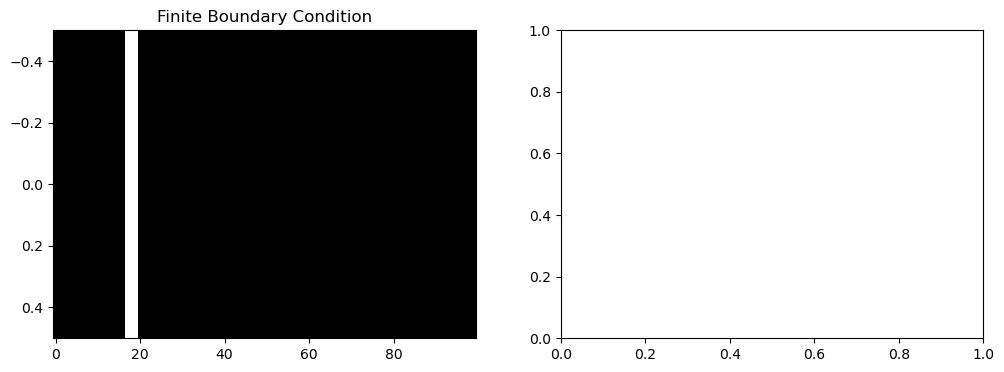

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
[1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
[0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
[1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

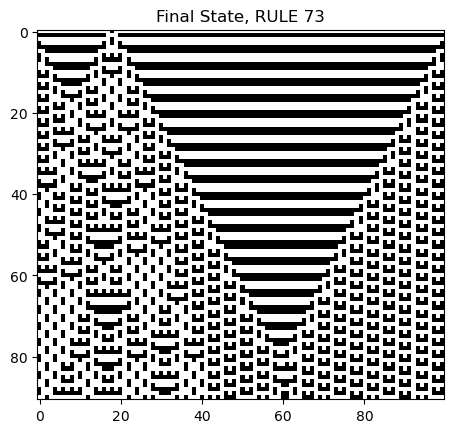

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def apply_rule_finite_grid(current_state, rule_bin):
    # Applies the provided rule to the current state of 3 cells for finite grid condition 
    # and returns the new state. Handles edge cells by assuming out-of-bound cells are 0.
    state_int = int(''.join(map(str, current_state)), 2)
    return rule_bin[7 - state_int]

def apply_rule_periodic(current_state, rule_bin):
    # Applies the provided rule to the current state of 3 cells with periodic boundary conditions
    # and returns the new state.
    index = 7 - int(''.join(map(str, current_state)), 2)
    return rule_bin[index]

def visualize_ca(ca_data, title):
    ca_array = np.array(ca_data)
    plt.imshow(ca_array, cmap='binary', interpolation='nearest')
    plt.title(title)
    plt.show()

def generate_initial_state(N):
    # Generate an array with a single seed site
    data = [0] * N
    rand_pos = np.random.randint(0, N - 1)
    data[rand_pos] = 1
    return data

def generate_random_initial_state(N):
    # Generate a random array for the specific number of sites with values 0 and 1 only
    return np.random.randint(2, size=N)

def run_ca(N, condition, cycles, rule_number):
    # New arrays to store output
    a = np.empty(N, dtype=int)
    b = np.empty(N, dtype=int)
    rule_number = 73
    rule_string = np.binary_repr(rule_number, 8)
    rule = np.array([int(bit) for bit in rule_string])

    # Visualization setup
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    initial_state = generate_initial_state(N) if condition == "F" else generate_random_initial_state(N)
    ca_data = [initial_state.copy()]

    cycles = int(cycles)

    if condition == "F":
        print("Generated array with finite bound: ")
        while cycles > 0:
            for i in range(N):
                left = 0 if i == 0 else initial_state[i - 1]
                center = initial_state[i]
                right = 0 if i == N - 1 else initial_state[i + 1]
                a[i] = apply_rule_finite_grid([left, center, right], rule)

            print(a)
            ca_data.append(a.copy())
            
            # For finite boundary condition, also append the initial state
            ca_data.append(initial_state.copy())
            
            # Update and show the plot for finite condition
            ax1.imshow([a], cmap='binary', aspect='auto')
            ax1.set_title('Finite Boundary Condition')
            plt.pause(0.1)

            initial_state = a.copy()
            cycles -= 1

    elif condition == "P":
        data2 = np.empty(N + 2, dtype=int)
        print("Generated array with periodic bound")

        for i in range(N + 2):
            if i == 0:
                data2[i] = initial_state[N - 1]
            elif i == N + 1:
                data2[i] = initial_state[0]
            else:
                data2[i] = initial_state[i - 1]

        while cycles > 0:
            for i in range(1, N + 1):
                left = data2[i - 1]
                center = data2[i]
                right = data2[i + 1]
                b[i - 1] = apply_rule_periodic([left, center, right], rule)

            print(b)
            #ca_data.append(b.copy())
            ca_data.append(data2[:N].copy())
            
            # Update and show the plot for periodic condition
            ax2.imshow([b], cmap='binary', aspect='auto')
            ax2.set_title('Periodic Boundary Condition')
            plt.pause(0.1)

            data2[:N] = b.copy()
            cycles -= 1

    visualize_ca(ca_data, "Final State, RULE 73")

# User inputs
N = input("Enter the number of Sites: ")
condition = input("Finite Grid(F) or Periodic Boundary Conditions(P)? Enter P or F: ") 
cycles = input("Enter number of cycles: ")

# Rule number
rule_number = 73

# Run the cellular automaton
run_ca(int(N), condition, cycles, rule_number)

Now for rule 136

Generated array with periodic bound
[0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0]


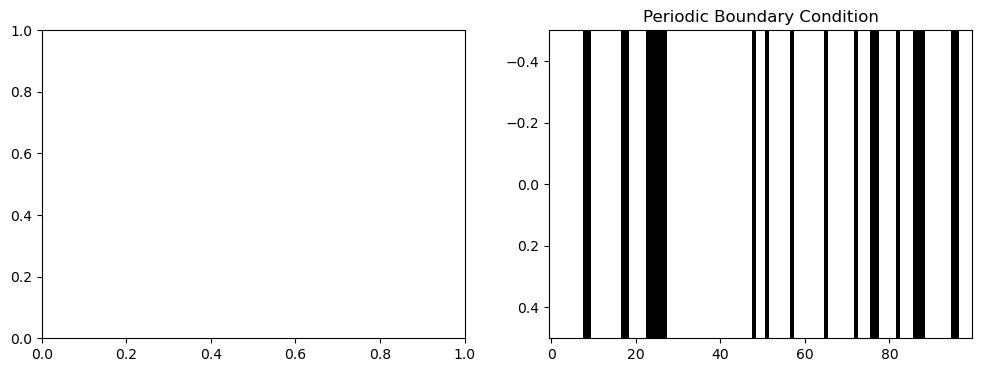

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

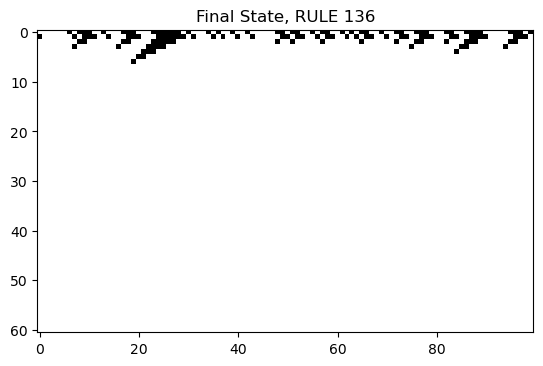

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def apply_rule_finite_grid(current_state, rule_bin):
    # Applies the provided rule to the current state of 3 cells for finite grid condition 
    # and returns the new state. Handles edge cells by assuming out-of-bound cells are 0.
    state_int = int(''.join(map(str, current_state)), 2)
    return rule_bin[7 - state_int]

def apply_rule_periodic(current_state, rule_bin):
    # Applies the provided rule to the current state of 3 cells with periodic boundary conditions
    # and returns the new state.
    index = 7 - int(''.join(map(str, current_state)), 2)
    return rule_bin[index]

def visualize_ca(ca_data, title):
    ca_array = np.array(ca_data)
    plt.imshow(ca_array, cmap='binary', interpolation='nearest')
    plt.title(title)
    plt.show()

def generate_initial_state(N):
    # Generate an array with a single seed site
    data = [0] * N
    rand_pos = np.random.randint(0, N - 1)
    data[rand_pos] = 1
    return data

def generate_random_initial_state(N):
    # Generate a random array for the specific number of sites with values 0 and 1 only
    return np.random.randint(2, size=N)

def run_ca(N, condition, cycles, rule_number):
    # New arrays to store output
    a = np.empty(N, dtype=int)
    b = np.empty(N, dtype=int)
    rule_number = 136
    rule_string = np.binary_repr(rule_number, 8)
    rule = np.array([int(bit) for bit in rule_string])

    # Visualization setup
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    initial_state = generate_initial_state(N) if condition == "F" else generate_random_initial_state(N)
    ca_data = [initial_state.copy()]

    cycles = int(cycles)

    if condition == "F":
        print("Generated array with finite bound: ")
        while cycles > 0:
            for i in range(N):
                left = 0 if i == 0 else initial_state[i - 1]
                center = initial_state[i]
                right = 0 if i == N - 1 else initial_state[i + 1]
                a[i] = apply_rule_finite_grid([left, center, right], rule)

            print(a)
            ca_data.append(a.copy())
            
            # For finite boundary condition, also append the initial state
            ca_data.append(initial_state.copy())
            
            # Update and show the plot for finite condition
            ax1.imshow([a], cmap='binary', aspect='auto')
            ax1.set_title('Finite Boundary Condition')
            plt.pause(0.1)

            initial_state = a.copy()
            cycles -= 1

    elif condition == "P":
        data2 = np.empty(N + 2, dtype=int)
        print("Generated array with periodic bound")

        for i in range(N + 2):
            if i == 0:
                data2[i] = initial_state[N - 1]
            elif i == N + 1:
                data2[i] = initial_state[0]
            else:
                data2[i] = initial_state[i - 1]

        while cycles > 0:
            for i in range(1, N + 1):
                left = data2[i - 1]
                center = data2[i]
                right = data2[i + 1]
                b[i - 1] = apply_rule_periodic([left, center, right], rule)

            print(b)
            #ca_data.append(b.copy())
            ca_data.append(data2[:N].copy())
            
            # Update and show the plot for periodic condition
            ax2.imshow([b], cmap='binary', aspect='auto')
            ax2.set_title('Periodic Boundary Condition')
            plt.pause(0.1)

            data2[:N] = b.copy()
            cycles -= 1

    visualize_ca(ca_data, "Final State, RULE 136")

# User inputs
N = input("Enter the number of Sites: ")
condition = input("Finite Grid(F) or Periodic Boundary Conditions(P)? Enter P or F: ") 
cycles = input("Enter number of cycles: ")

# Rule number
rule_number = 136

# Run the cellular automaton
run_ca(int(N), condition, cycles, rule_number)

In conclusion, when using Finite Boundary conditions, the cellular automation grid is definite and has a fixed state, as it is assumed that each end of the array is assumed to have an extra 0.
while on the other hand, for periodic boundary conditions, the grid can be described as if they wrap around to the opposite side which creates something like a torodial topology